# Loading packages

In [1]:
import metaknowledge as mk
import pandas as pd
import numpy as np
from random import randint
import datetime
import copy
from sklearn.cluster import KMeans

import umap
from scipy import stats

from tqdm import tqdm_notebook as tqdm

from enstop import EnsembleTopics

from scipy.sparse import coo_matrix, vstack
from scipy.sparse import csr_matrix
import scipy as scipy

import math
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

#For Tables:
from IPython.display import display
from IPython.display import Latex
pd.set_option('display.max_columns', 500)

#For R (ggplot2)
%load_ext rpy2.ipython

# from sklearn.externals.joblib import Memory
# memory = Memory(cachedir='/tmp', verbose=0)
# @memory.cache

import gc
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.cluster import adjusted_rand_score, mutual_info_score

import re
from joblib import Parallel, delayed
import multiprocessing
#Embedding:
#Clustering:
import hdbscan


import umap

# Loading Data

In [2]:
RC = mk.RecordCollection("full")#extraction1970_1999

# Removing unusable records & having a look at our data:


In [3]:
# print(RC.glimpse())
RC2 = mk.RecordCollection()

for R in tqdm(RC):
    randnr = randint(0, 4)
    
    if len(R.getCitations().get("author"))>=2: # and randnr==0 apply condition in order to downsample records
        #Here we kick out every paper that cites less then 1 author. Why? because they
        #are so dissimilar from the others, that they only produce noise.  
   
        try:
            R['year']
           # print(R['WC'])
#             if 'History' in R['WC']:
            #R['abstract']  #Add this when working with abstracts. It removes every paper that has none. 
            #This can sometimes remove whole journals, that are archived without abstracts, so handle with care.
            RC2.add(R)
        except KeyError:
            pass
    else:
        pass
    

# print(RC2.glimpse())


RC = RC2
print(RC.glimpse())


RecordCollection glimpse made at: 2019-10-22 12:59:13
162103 Records from Empty

Top Authors
1 Gupta, Rangan
2 Hammoudeh, Shawkat
3 Shahbaz, Muhammad
4 THEIL, H
5 Bahmani-Oskooee, Mohsen
6 Lin, Boqiang
6 Apergis, Nicholas
7 Managi, Shunsuke
8 FISHBURN, PC
9 Smyth, Russell
10 Tiwari, Aviral Kumar
11 Balcilar, Mehmet
12 Chang, Tsangyao
13 Wohar, Mark E.
14 Lee, Chien-Chiang
15 Hensher, David A.
16 Duc Khuong Nguyen
16 SMITH, VK
16 Fan, Ying
17 Nayga, Rodolfo M., Jr.
18 URI, ND

Top Journals
1 ECONOMICS LETTERS
2 ENERGY POLICY
3 APPLIED ECONOMICS
4 WORLD DEVELOPMENT
5 JOURNAL OF BANKING & FINANCE
6 EUROPEAN ECONOMIC REVIEW
7 ECONOMIC MODELLING
8 ENERGY ECONOMICS
9 JOURNAL OF ECONOMIC BEHAVIOR & ORGANIZATION
10 ECOLOGICAL ECONOMICS
10 JOURNAL OF ECONOMETRICS
11 APPLIED ECONOMICS LETTERS
12 JOURNAL OF ECONOMIC THEORY
13 JOURNAL OF PUBLIC ECONOMICS
14 TRANSPORTATION RESEARCH PART A-POLICY AND PRACTICE
15 PUBLIC CHOICE
16 ECONOMIC INQUIRY
17 REGIONAL STUDIES
18 TRANSPORTATION RESEARCH PART B

In [4]:
drc = pd.DataFrame(RC.makeDict()).merge(pd.DataFrame.from_dict(RC.forNLP()),left_index =True,right_index=True)
display(drc)

,PT,AU,AF,TI,SO,LA,DT,DE,ID,AB,C1,RP,CR,NR,TC,Z9,U1,U2,PU,PI,PA,SN,J9,JI,PD,PY,VL,IS,BP,EP,DI,PG,WC,SC,GA,UT,DA,EM,OI,FU,FX,EI,RI,OA,CT,CY,CL,HC,HP,SI,PM,EA,SP,SU,AR,PN,HO,CA,num-Authors,num-Male,num-Female,num-Unknown,id,year,title,keywords,abstract
0,J,"[MORRISON, CJ, SCHWARTZ, AE]","[MORRISON, CJ, SCHWARTZ, AE]",DISTINGUISHING EXTERNAL FROM INTERNAL SCALE EF...,JOURNAL OF PRODUCTIVITY ANALYSIS,English,Article,"[scale, aggregate increasing returns, producti...","[PRODUCTIVITY-MEASUREMENT, UNITED-STATES, GROWTH]",The recent applied production theory literatur...,"[NYU,WAGNER SCH PUBL SERV,NEW YORK,NY 10003.]","MORRISON, CJ (reprint author), TUFTS UNIV,DEPT...","[ASCHAUER DA, 1989, J MONETARY ECON, V23, P177...",14,20,20,[0],[0],KLUWER ACADEMIC PUBL,DORDRECHT,"SPUIBOULEVARD 50, PO BOX 17, 3300 AA DORDRECHT...",0895-562X,J PROD ANAL,J. PROD. ANAL.,10.0,1994,5,3,249,270,10.1007/BF01073910,22,"[Business, Economics, Social Sciences, Mathema...","[Business & Economics, Mathematical Methods In...",PX664,WOS:A1994PX66400003,[2019-10-20],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,0,0,2,WOS:A1994PX66400003,1994,DISTINGUISHING EXTERNAL FROM INTERNAL SCALE EF...,PRODUCTIVITY-MEASUREMENT|UNITED-STATES|GROWTH,the recent applied production theory literatur...
1,J,"[Thornton, J]","[Thornton, J]",Are malpractice insurance premiums a tort sign...,ECONOMICS LETTERS,English,Article,"[physician labor supply, income effects, tort ...",None,This study reports some new evidence on the im...,None,"Thornton, J (reprint author), EASTERN MICHIGAN...","[*AM MED ASS, 1977, PROF MED PRACT, *AM MED AS...",14,2,2,[0],[0],ELSEVIER SCIENCE SA LAUSANNE,LAUSANNE,"PO BOX 564, 1001 LAUSANNE, SWITZERLAND",0165-1765,ECON LETT,ECON. LETT.,9.0,1997,55,3,403,407,10.1016/S0165-1765(97)00103-1,5,[Economics],[Business & Economics],XZ785,WOS:A1997XZ78500017,[2019-10-20],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1,0,0,1,WOS:A1997XZ78500017,1997,Are malpractice insurance premiums a tort sign...,,this study reports some new evidence on the im...
2,J,"[LAVALLE, IH, XU, YS]","[LAVALLE, IH, XU, YS]",INFORMATION EVALUATION UNDER NONADDITIVE EXPEC...,JOURNAL OF RISK AND UNCERTAINTY,English,Article,None,None,None,"[TULANE UNIV,DEPT ECON,NEW ORLEANS,LA 70118.]","LAVALLE, IH (reprint author), TULANE UNIV,AB F...","[ANSCOMBE FJ, 1963, ANN MATH STAT, V34, P199, ...",25,2,2,[0],[0],KLUWER ACADEMIC PUBL,DORDRECHT,"SPUIBOULEVARD 50, PO BOX 17, 3300 AA DORDRECHT...",0895-5646,J RISK UNCERTAINTY,J. RISK UNCERTAIN.,9.0,1990,3,3,261,275,10.1007/BF00116784,15,"[Business, Finance, Economics]",[Business & Economics],EC379,WOS:A1990EC37900004,[2019-10-20],None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,0,0,2,WOS:A1990EC37900004,1990,INFORMATION EVALUATION UNDER NONADDITIVE EXPEC...,,
3,J,"[Wang, XD, He, JM]","[Wang, Xiandong, He, Jianmin]",A simple method for generalized sequential com...,MATHEMATICAL SOCIAL SCIENCES,English,Article,None,"[VALUATION, BIVARIATE, AMERICAN, INVESTMENTS, ...",This paper presents a new and simple method to...,"[Changzhou Inst Technol, Dept Math & Appl Math...","Wang, XD (reprint author), Changzhou Inst Tech...","[Agliardi E., 2005, RISK LETT, V1, P1, Anderga...",36,0,0,[1],[11],ELSEVIER SCIENCE BV,AMSTERDAM,"PO BOX 211, 1000 AE AMSTERDAM, NETHERLANDS",0165-4896,MATH SOC SCI,MATH. SOC. SCI.,5.0,2017,87,None,85,91,10.1016/j.mathsocsci.2017.03.001,7,"[Economics, Mathematics, Interdisciplinary App...","[Business & Economics, Mathematics, Mathematic...",EU9RS,WOS:000401377900010,[2019-10-19],[wxd.06@163.com],"[Wang, Xiandong/0000-0002-0635-856X]",[Natural Science Foundation of ChinaNational N...,This research is supported by the Natural Scie...,1879-3118,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2,0,0,2,WOS:000401377900010,2017,A simple method for gener

# Vectorizing:

In [5]:
########### Cited Works - Features ############



drc['timestamp'] = pd.to_numeric(drc["year"], errors='coerce') + drc["PD"].fillna(0).replace('', 0, regex=True)/12

def processInput(R):
    d = list(set(R.getCitations().get("citeString")))
    citedAU = list(set(R.getCitations().get("author")))
    return d, citedAU
 
num_cores = multiprocessing.cpu_count()


results = Parallel(n_jobs=num_cores)(delayed(processInput)(R) for R in RC)


d, citedAU = map(list, zip(*results))


drc["citedAU"] = citedAU
drc["citestring"] = d
#print(d[0])
authorslist = ['§'.join(filter(None,x)) for x in list(d)] 
#print(authorslist[0])

# vec = TfidfVectorizer(token_pattern=r'(?<=[^|§])[\s\w,\.:;]+(?=[$|§])')
vec = CountVectorizer(token_pattern=r'(?<=[§])[\s\w,\.:;\/\[\]-]+(?=[§])',binary=True, min_df = 2)#)


Xrc = vec.fit_transform(authorslist)

# Filtering:
There are always a few thousand unconnencted redords, citing only stuff noone else cites. We can get rid of them by doing a umap embedding and removing everything that forms a small ball at the side. (Not sure whether that's the best method though.)

In [6]:

M = Xrc
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components= 100, n_iter=7, random_state=42)

XSVD = SVD.fit_transform(M)
# print(SVD.explained_variance_ratio_.sum())
# dSVD = pd.DataFrame(XSVD)

# sSVD = dSVD[[0,1]]
# sSVD.columns = ['x','y']

In [7]:
twodmap = umap.UMAP(n_components= 2,metric="cosine"#"hellinger"
                    ,n_neighbors=6,
                      min_dist=0.001,
                    verbose=True
                   ).fit(XSVD)#[:,:-1])

UMAP(a=None, angular_rp_forest=False, b=None,
   force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
   local_connectivity=1.0, metric='cosine', metric_kwds=None,
   min_dist=0.001, n_components=2, n_epochs=None, n_neighbors=6,
   negative_sample_rate=5, output_metric='euclidean',
   output_metric_kwds=None, random_state=None, repulsion_strength=1.0,
   set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
   target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
   transform_queue_size=4.0, transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Tue Oct 22 13:06:42 2019 Finding Nearest Neighbors
Tue Oct 22 13:06:42 2019 Building RP forest with 25 trees
Tue Oct 22 13:07:16 2019 NN descent for 17 iterations
Tue Oct 22 13:07:45 2019 Finished Nearest Neighbor Search
Tue Oct 22 13:07:54 2019 Construct embedding


C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:239: UserWarning: Embedding a total of 82 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Oct 22 13:10:37 2019 Finished embedding


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


2


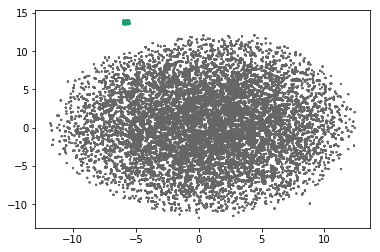

In [8]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=1000,min_samples =100).fit(twodmap.embedding_)
print(len(set(clusterer.labels_)))
import matplotlib as mpl
cmap = mpl.cm.cool
plt.scatter(twodmap.embedding_[:, 0], twodmap.embedding_[:, 1], c=clusterer.labels_, cmap='Dark2', s=1)


In [9]:
core_cluster = pd.DataFrame(pd.DataFrame(clusterer.labels_)[0].value_counts()).idxmax()
where_core = list(np.where(clusterer.labels_ == core_cluster[0])[0])
drc = drc.ix[where_core].reset_index()
Xrc = Xrc[where_core]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


# And now for the real embedding:

In [11]:
M = Xrc
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components= 200, n_iter=7, random_state=42)

XSVD = SVD.fit_transform(M)
print(SVD.explained_variance_ratio_.sum())
dSVD = pd.DataFrame(XSVD)

0.049052880721247


In [12]:
import umap
from scipy import stats
to_cluster = umap.UMAP(random_state=42,
                    n_components=2,
                    n_neighbors=20,
                    min_dist=0.005,
                    metric='cosine',
                    verbose=True)

to_cluster.fit(XSVD[:,1:])

UMAP(a=None, angular_rp_forest=False, b=None,
   force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
   local_connectivity=1.0, metric='cosine', metric_kwds=None,
   min_dist=0.005, n_components=2, n_epochs=None, n_neighbors=20,
   negative_sample_rate=5, output_metric='euclidean',
   output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
   set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
   target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
   transform_queue_size=4.0, transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Tue Oct 22 13:17:52 2019 Finding Nearest Neighbors
Tue Oct 22 13:17:52 2019 Building RP forest with 25 trees
Tue Oct 22 13:18:15 2019 NN descent for 17 iterations
Tue Oct 22 13:19:42 2019 Finished Nearest Neighbor Search
Tue Oct 22 13:20:45 2019 Construct embedding


C:\ProgramData\Anaconda3\lib\site-packages\umap\spectral.py:239: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Oct 22 13:25:21 2019 Finished embedding


UMAP(a=None, angular_rp_forest=False, b=None,
   force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
   local_connectivity=1.0, metric='cosine', metric_kwds=None,
   min_dist=0.005, n_components=2, n_epochs=None, n_neighbors=20,
   negative_sample_rate=5, output_metric='euclidean',
   output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
   set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
   target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
   transform_queue_size=4.0, transform_seed=42, verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


181


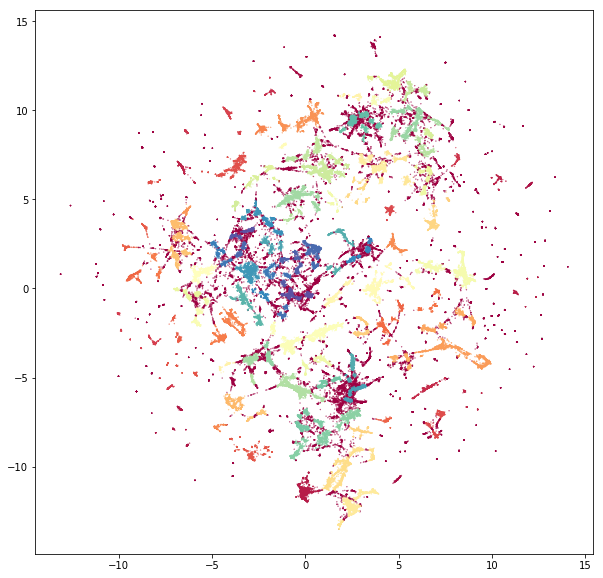

In [13]:
plt.figure(figsize=(10,10))

import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=300,min_samples =100).fit(to_cluster.embedding_)
plt.scatter(to_cluster.embedding_[:, 0], to_cluster.embedding_[:, 1], s=0.1, c=clusterer.labels_, cmap='Spectral')
col_len = len(set(clusterer.labels_))-1
print(col_len)

# Now, extract the data for the labeling of the clusters:

In [14]:
%%R -i col_len -o color_scale
# make pretty colors (in R, for some reason...), maybe switch to colorcet?
mycolors <- c('#cc0011', '#002244', '#dddd33', '#004488', '#003311', '#11aaaa','#2E6697', '#9B2006')
pal <- colorRampPalette(sample(mycolors))
color_scale <- sample(pal(col_len))
color_scale <- c(c("#CDCDCD"),c(color_scale))

In [15]:
import yake
language = "en"
max_ngram_size = 2
deduplication_thresold = 0.7
deduplication_algo = 'seqm'
windowSize = 1
numOfKeywords = 20
drc['labels'] = 'noise'


for cluster_num in tqdm(range(0,col_len)):
    w = np.where(clusterer.labels_==cluster_num)[0]
    text = ' '.join(drc['title'][w])+' '.join(drc['abstract'][w])
    text.replace('article','')
    custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)
    keywords = custom_kw_extractor.extract_keywords(text)

    kws = []
    for kw in keywords:
        kws.append(kw[0])
    drc['labels'][w] = ', '.join(kws)
#     https://github.com/LIAAD/yake

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [16]:
drc['journal_labels'] = 'noise'
for cluster_num in tqdm(range(0,col_len)):
    w = np.where(clusterer.labels_==cluster_num)[0]
    vc = drc['SO'][w].value_counts()
    top_journals = list(vc[vc > vc.max()/3].index)
    drc['journal_labels'][w] = ', '.join(top_journals).title() 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
drc['sources_labels'] = 'noise'
from collections import Counter

for cluster_num in tqdm(range(0,col_len)):
    w = np.where(clusterer.labels_==cluster_num)[0]
    vc = drc['CR'][w]
    vc = [j for i in vc for j in i]
    top_sources= [str(word) for word, word_count in Counter(vc).most_common(3)]

#     print(top_sources)
    drc['sources_labels'][w] = ', '.join(top_sources).title() 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [18]:
drc['tooltip'] = ('<b>Title: </b>' + drc['title'] +
                    '<br><b>Cluster-Keywords: </b><em>'+drc['labels']+
                    '</em>'+'<br><b>Top Journals: </b>'+drc['journal_labels']+
                    '</em>'+'<br><b>Top Articles: </b>'+drc['sources_labels'])

In [21]:
from faerun import Faerun, host
from matplotlib import colors

    
cmap = colors.LinearSegmentedColormap.from_list('cmap',list(color_scale),len(list(color_scale)))
print(to_cluster.embedding_[:, 0].max()-to_cluster.embedding_[:, 0].min())
print(to_cluster.embedding_[:, 1].max()-to_cluster.embedding_[:, 1].min())

drc['keywords'] = drc['title'].fillna('missing')
f_data = {'x': to_cluster.embedding_[:, 0], 'y': to_cluster.embedding_[:, 1],
          'c': clusterer.labels_,'labels': drc['tooltip'].str.replace('[^\w\s:,!?\.<>\/-]', '').values}
# <img src="overlay.svg" id="overlay" alt="overlay" width="100%">
f = Faerun(title='Structure of Economics, 2019', clear_color='#ffffff',
           coords=False, scale= 750,
           view='front',alpha_blending=True,
           anti_aliasing=True)



f.add_scatter('econ', f_data,  colormap=cmap,saturation_limit = 0.4,
              point_scale=1.2,shader="circle",fog_intensity=0,
                categorical=True)



f.plot('econ')#,template='template_test.j2')

27.17692
27.73988


C:\Users\noich\OneDrive\Desktop\econ\econ.html